In [2]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt
from topic_modelling import get_topics
import time

nlp = en_core_web_lg.load()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
colors = ['skyblue', 'red', 'yellow']

In [4]:
def create_graph(final_nodes, cnt):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    print("\nTotal number of extracted pairs:", len(edge))
    print("\nEdges: ", edge)
    print("\nEntities: ", final_nodes)
    if(len(edge)==0 or len(final_nodes)==0):
        print('False')
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color=colors[cnt], node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G, edge_labels

final_nodes:  [('Hu', 'sold', 'least $ 60 million in fake finance loans'), ('Hu', 'sold', 'to investors'), ('The complaint ,', 'charges', 'Hu'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount'), ('the SEC', 'obtained', 'a final judgment on consent'), ('consent', 'enjoining', 'IIG'), ('consent', 'violating', 'the antifraud provisions of the federal securities laws'), ('consent', 'pay', 'IIG'), ('consent', 'pay', 'more than $ 35 million in disgorgement interest'), ('consent', 'pay', 'more than $ 35 million in')]

Total number of extracted pairs: 12

Edges:  ['sold', 'sold', 'charges', 'consent', 'determine', 'determine', 'obtained', 'enjoining', 'violating', 'pay', 'pay', 'pay']

Entities:  [('Hu', 'sold', 'least $ 60 million in fake finance loans'), ('Hu', 'sold', 'to investors'), ('The complaint ,', 'charges', 'Hu'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'a

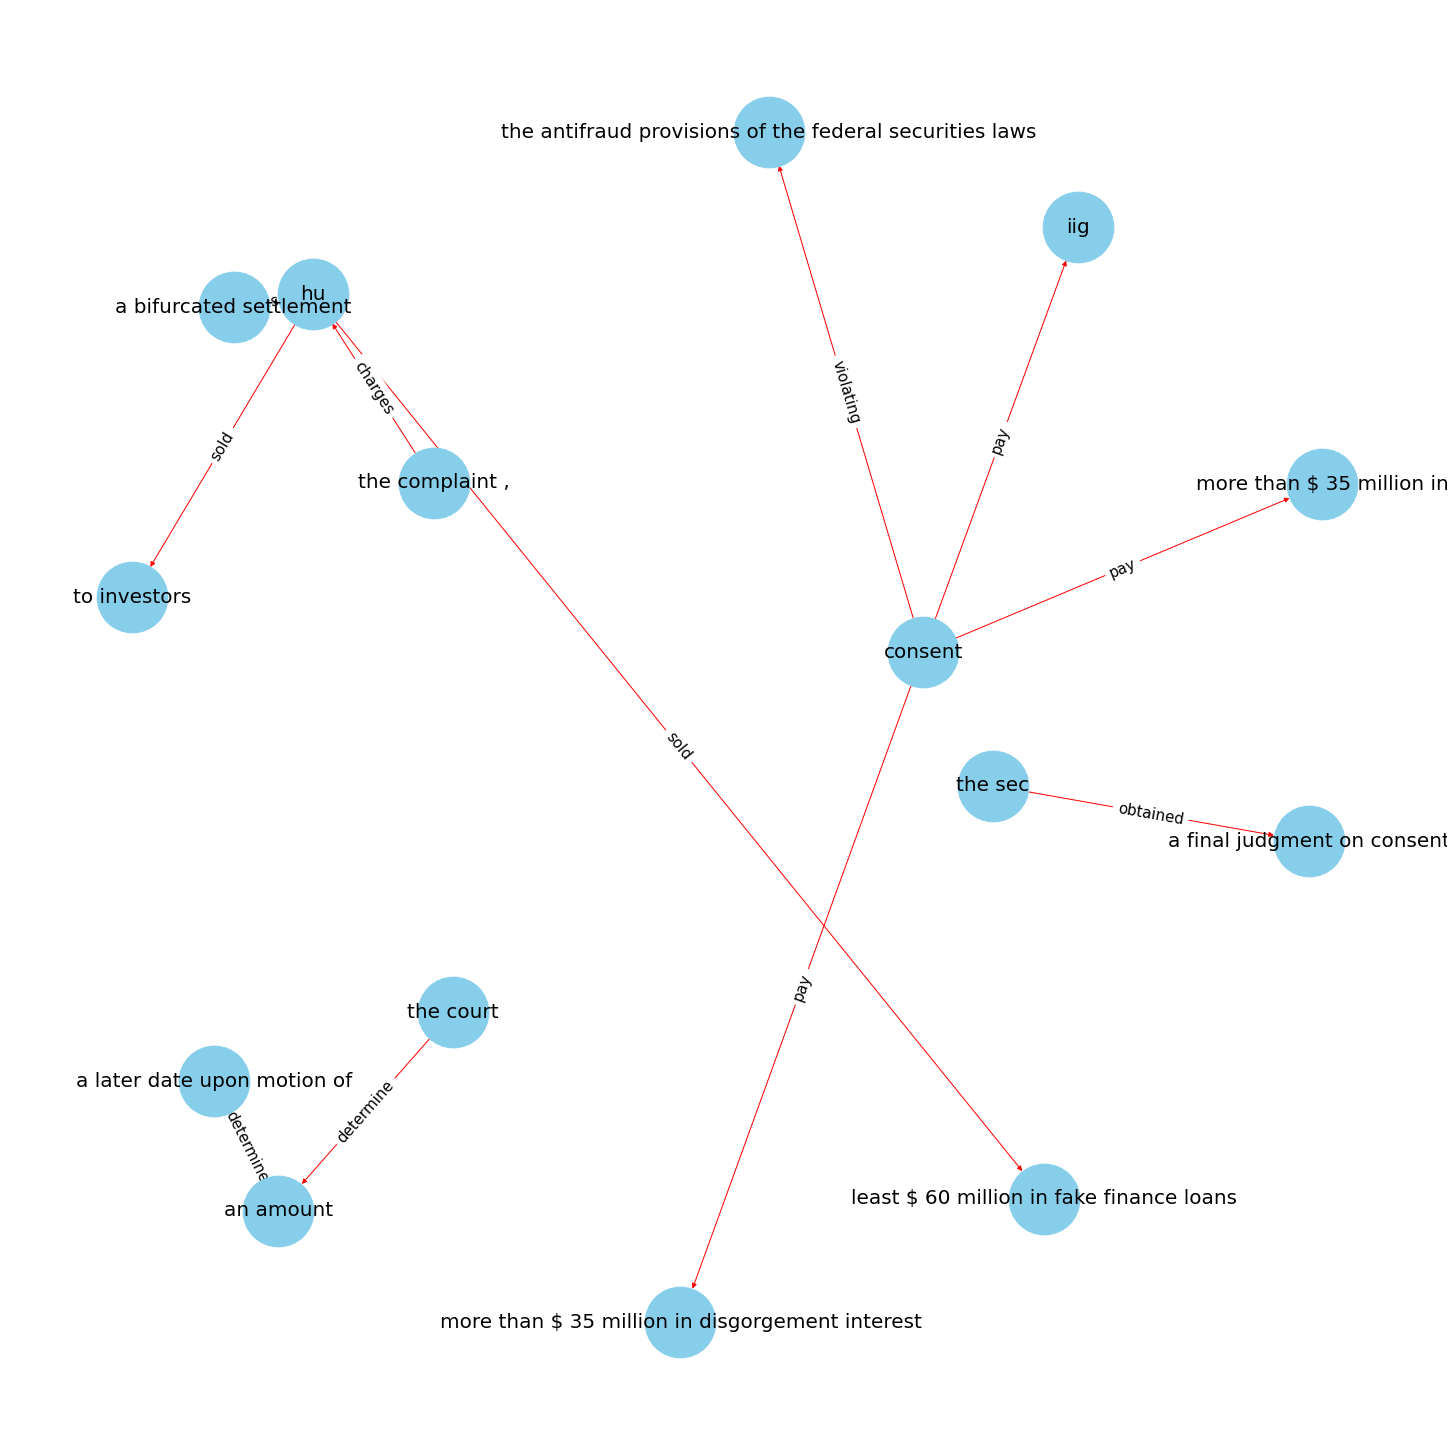

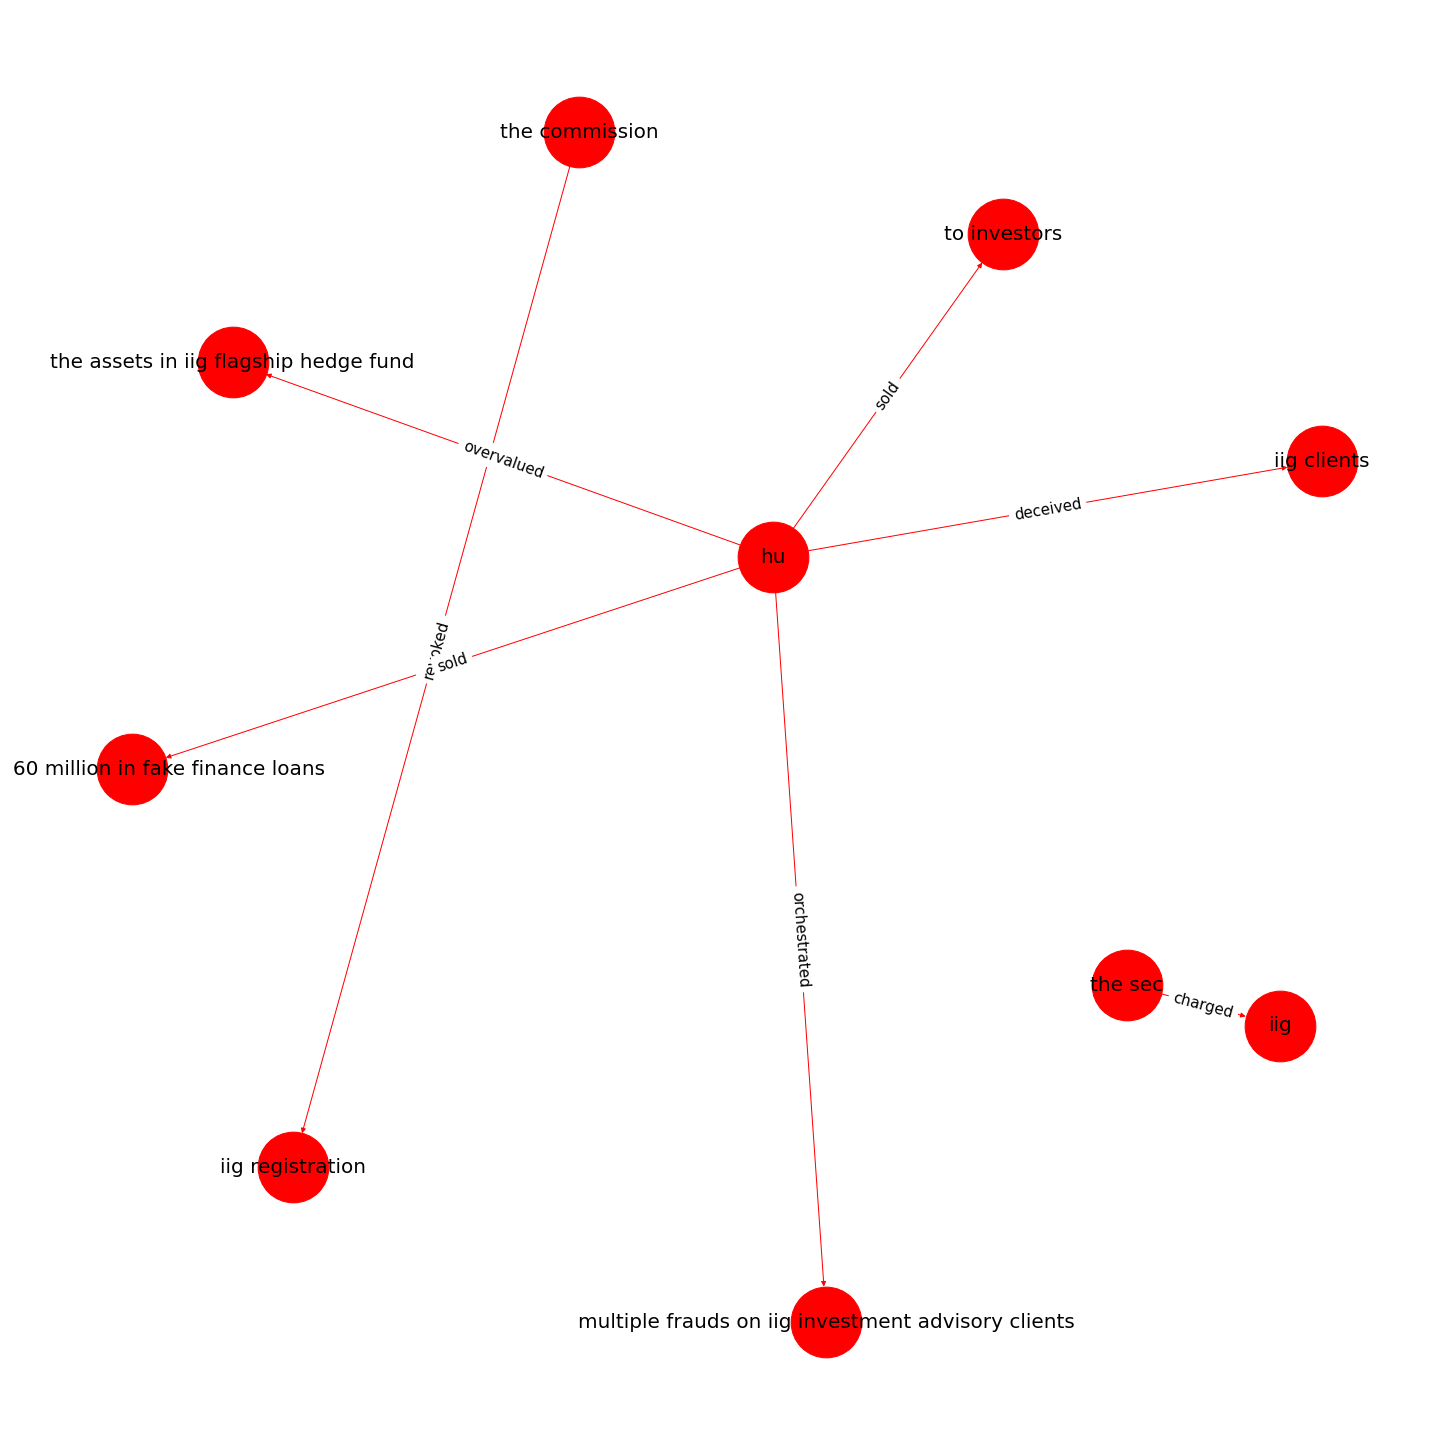

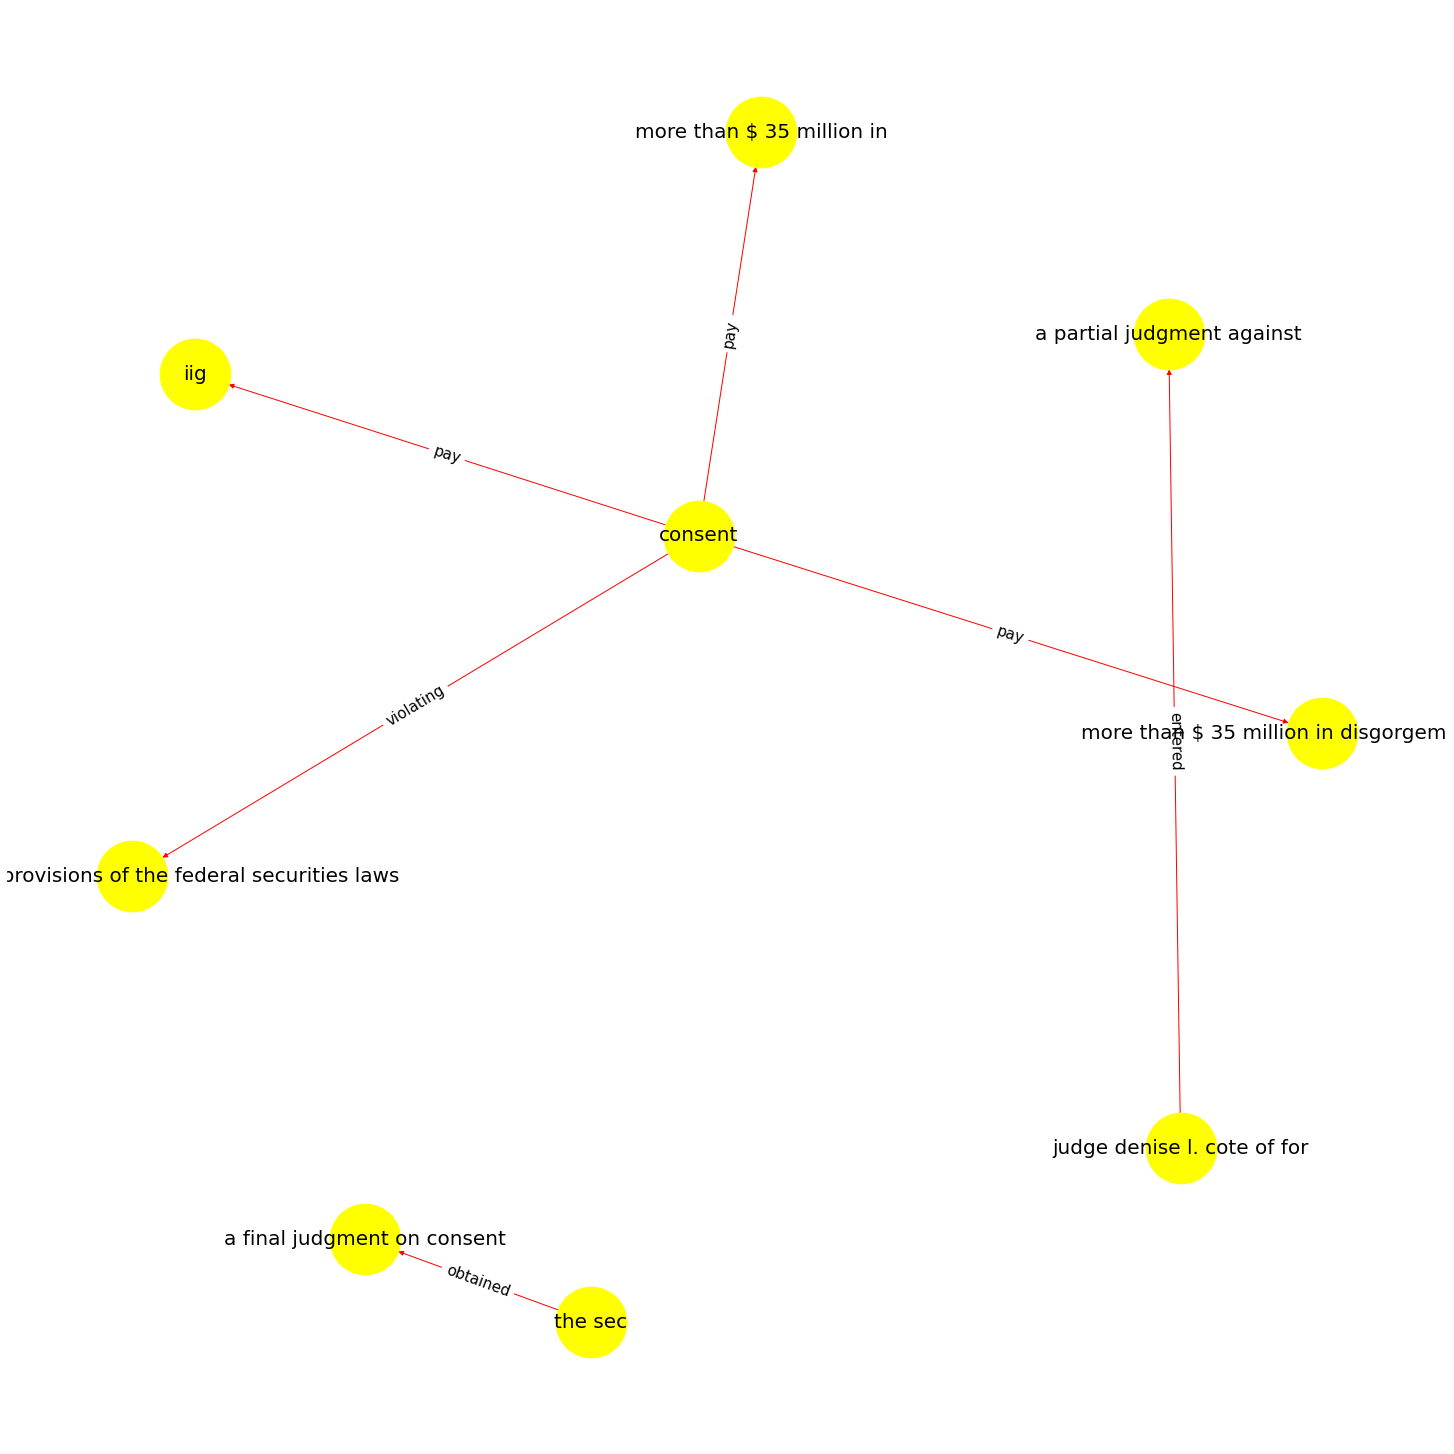

In [6]:
no_of_topics = 3
topics = get_topics('docs/text3.txt', no_of_topics)
cnt=-1

graphs = []
for i in topics:
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    print('final_nodes: ', final_nodes)
    graphs.append(create_graph(final_nodes, cnt))
    name = str(time.time())
    plt.savefig('./images/' + name + '.png')


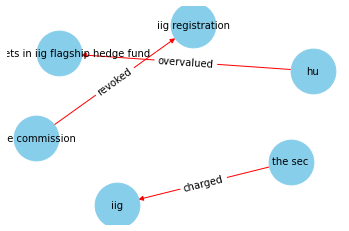

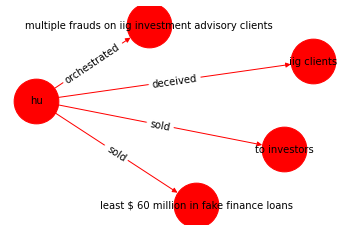

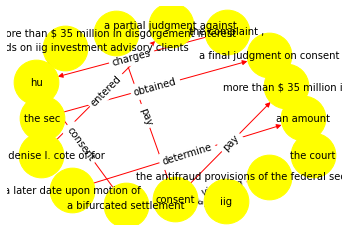

In [6]:
i=0
for graph in graphs:
    ax = plt.subplots()
    pos = nx.spring_layout(graph[0],k=10)
    nx.draw(graph[0], with_labels=True, node_color=colors[i], node_size=2000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=10, ax=None)
    nx.draw_networkx_edge_labels(graph[0],pos,edge_labels=graph[1], font_size=10)
    i=i+1
